### Importar librerias necesarias

In [7]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install mtcnn
!pip install keras_applications
!pip install tensorflow==2.2

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-2wdltau2
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-2wdltau2
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 516.2 MB 3.3 kB/s eta 0:00:016     |██████▋                         | 106.1 MB 2.3 MB/s eta 0:02:56     |██████████▉                     | 174.4 MB 4.7 MB/s eta 0:01:14     

  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.0.4
    Uninstalling tensorflow-2.0.4:
      Successfully uninstalled tensorflow-2.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depende

### Extraccion del Embedding Facial

In [10]:
# MTCNN es una libreria que detecta las caras con sus respectivas coordenadas en una imagen
from mtcnn import MTCNN
# VGG-FACE es un modelo preentrenado de reconocimiento facial
import keras_vggface
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

from scipy.spatial.distance import cosine

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# creamos una instancia del detector
detector = MTCNN()

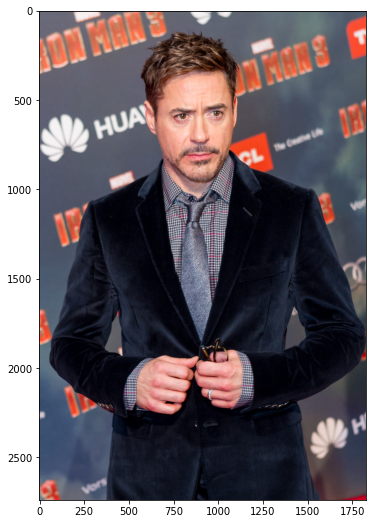

In [3]:
# cargamos la imagen
image = cv2.imread('Faces/robert_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(9, 9))
plt.imshow(image)
plt.show()

In [4]:
# pasamos la imagen por el detector de caras para extraer la imagen recortada
results = detector.detect_faces(image)
print(results)

[{'box': [657, 336, 442, 614], 'confidence': 0.9999245405197144, 'keypoints': {'left_eye': (794, 591), 'right_eye': (989, 579), 'nose': (904, 726), 'mouth_left': (818, 817), 'mouth_right': (983, 802)}}]


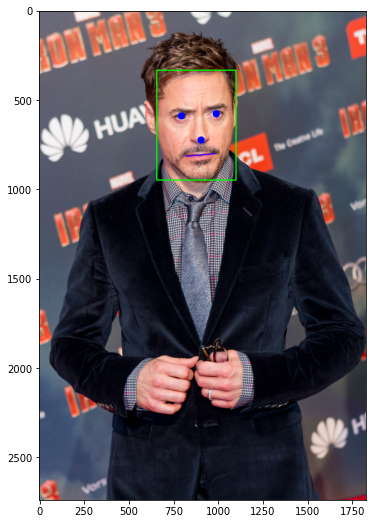

In [5]:
# dibujamos las partes de la cara del detector usando opencv
canvas = image.copy()
result = results[0]

# caja de la cara
x, y, w, h = result['box']
cv2.rectangle(canvas, (x, y), (x+w, y+h), (0, 255, 0), 5)

# mas detalles de la cara
cv2.circle(canvas, result['keypoints']['left_eye'], 20, (0, 0, 255), -1)
cv2.circle(canvas, result['keypoints']['right_eye'], 20, (0, 0, 255), -1)
cv2.circle(canvas, result['keypoints']['nose'], 20, (0, 0, 255), -1)
cv2.line(canvas, result['keypoints']['mouth_left'], result['keypoints']['mouth_right'], (50, 0, 255), 5)

plt.figure(figsize=(9, 9))
plt.imshow(canvas)
plt.show()

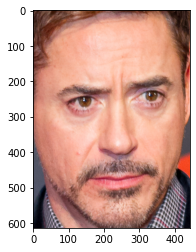

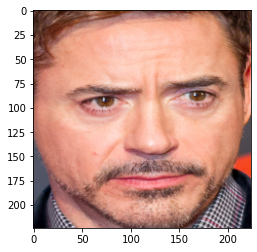

In [6]:
# recortamos la cara
cara = image[y: y+h, x: x+w]

# hay que cambiar su tamaño para cumplir los requerimientos de entrada del modelo preentrenado
cara_res = cv2.resize(cara, (224, 224), cv2.INTER_LANCZOS4)

plt.figure(1)
plt.imshow(cara)

plt.figure(2)
plt.imshow(cara_res)

plt.show()

In [7]:
# cargamos el modelo
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
model.summary()

94699520/94694792 [==============================] - 24s 0us/step
Model: "vggface_resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_4[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
_________________

In [8]:
# efectuamos la prediccion
# la funcion "proprocess_input" procesa los valores de los pixeles de la imagen 
# para que cumplan la misma estadistica que cuando se entreno
face_in = np.expand_dims(cara_res.astype('float32'), axis=0)
face_in = preprocess_input(face_in, version=2)

# damos un paso del modelo
face_embedding = model.predict(face_in)
print(face_embedding.shape)

(1, 2048)


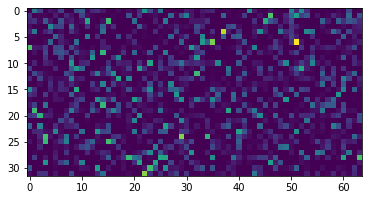

In [9]:
# podemos ver el embedding como un imagen...
plt.imshow(face_embedding.reshape(32, 64) / face_embedding.max())
plt.show()

### Ejercicio 1:
## Reconocimiento facial

In [ ]:
# Usando las fotos "robert_1.jpg" y "robert_2.jpg", comparar la distancia cosenoidal
# de sus embeddings. Para distancia consultar la funcion: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
# obtener un unico valor de distancia en unidades lineales unidimensionales

# Ahora usar "robert_1.jpg" y "anne_1.jpg" para ver que la distancia cambia
# obtener un unico valor de distancia en unidades lineales unidimensionales

In [22]:
def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [39]:
def get_face(img):
    results = detector.detect_faces(img)
    result = results[0]

    # caja de la cara
    x, y, w, h = result['box']

    cara = img[y: y+h, x: x+w]
    return cara

In [45]:
def get_face_from_path(path):
    image = read_image(path)
    return get_face(image)

In [24]:
def get_embedding(model, face):

    # hay que cambiar su tamaño para cumplir los requerimientos de entrada del modelo preentrenado
    cara_res = cv2.resize(face, (224, 224), cv2.INTER_LANCZOS4)

    face_in = np.expand_dims(cara_res.astype('float32'), axis=0)
    face_in = preprocess_input(face_in, version=2)

    # damos un paso del modelo
    face_embedding = model.predict(face_in)
    return face_embedding

In [50]:
def print_embedding(emb, *arg):
    plt.figure(figsize=(9, 9))
    plt.imshow(emb.reshape(32, 64) / emb.max())
    if len(arg) > 0:
        for a in arg:
            plt.imshow(a.reshape(32, 64) / a.max())
    plt.show()

In [40]:
# TO-DO
# Robert 1 vs Robert 2
image_1 = read_image('Faces/robert_1.jpg')
cara_1 = get_face(image_1)
image_2 = read_image('Faces/robert_2.jpg')
cara_2 = get_face(image_2)

robert_1_embedding = get_embedding(model, cara_1)
robert_2_embedding = get_embedding(model, cara_2)

print(cosine(robert_1_embedding, robert_2_embedding))

0.11337953805923462


In [41]:
# Robert 1 vs Anne 1
image = read_image('Faces/anne_1.jpg')
cara = get_face(image)

anne_1_embedding = get_embedding(model, cara)

print(cosine(robert_1_embedding, anne_1_embedding))

0.6865131258964539


In [42]:
# Robert 1 vs Anne 2
image = read_image('Faces/anne_2.jpg')
cara = get_face(image)

anne_2_embedding = get_embedding(model, cara)

print(cosine(robert_1_embedding, anne_2_embedding))

0.758064016699791


In [43]:
# Robert 2 vs Anne 1
print(cosine(robert_2_embedding, anne_1_embedding))

0.7088313400745392


In [44]:
# Robert 2 vs Anne 2
print(cosine(robert_2_embedding, anne_2_embedding))

0.7730589359998703


### Ejercicio 2:
## Quien es quien

In [ ]:
# En las fotos "anne_3.jpg" y "robert_3.jpg", hay 2 personas y solo una la conocemos.
# Hay que extraer el embedding de una foto identificativa de la persona conocida ("anne/robert_1/2.jpg")
# para que al comparar las distancias de los embeddings, saber quien es la persona conocida.

In [67]:
def get_all_faces(img):
    results = detector.detect_faces(img)
    caras = []
    
    for i in results:
        # caja de la cara
        x, y, w, h = i['box']

        cara = img[y: y+h, x: x+w]
        
        caras.append(cara)
        
    return caras, results

In [74]:
def get_most_similar_face(image, true_face):
    faces, boxes = get_all_faces(image)
    embedding = get_embedding(model, faces[0])
    true_embedding = get_embedding(model, true_face)
    dis = cosine(true_embedding, embedding)
    similar_face = faces[0]
    similar_box = boxes[0]
    for f in faces:
        embedding_aux = get_embedding(model, f)
        dis_aux = cosine(true_embedding, embedding_aux)
        if dis_aux < dis :
            embedding = embedding_aux
            dis = dis_aux
            similar_face = f
            similar_box = boxes[faces.index(f)]
            
    return similar_face, similar_box

In [90]:
def draw_box(image, box, all_boxes=None, color=(0, 255, 0)):
    canvas = image.copy()
    
    if all_boxes != None:
        for b in all_boxes:
            x, y, w, h = b['box']
            cv2.rectangle(canvas, (x, y), (x+w, y+h), (255,0,0), 5)
    
    # caja de la cara
    x, y, w, h = box['box']
    cv2.rectangle(canvas, (x, y), (x+w, y+h), color, 5)
    
    return canvas

In [52]:
# TO-DO
anne_true = get_face_from_path('Faces/anne_1.jpg')

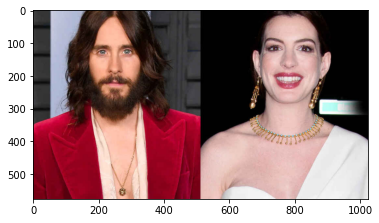

In [92]:
image = read_image('Faces/anne_3.jpg')
plt.imshow(image)

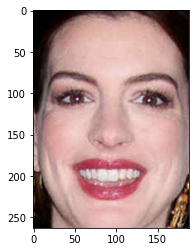

In [93]:
res_face, res_box = get_most_similar_face(image, anne_true)
plt.imshow(res_face)

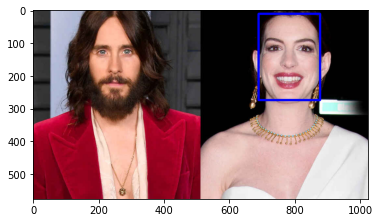

In [94]:
plt.imshow(draw_box(image, res_box, color=(0,0,255)))

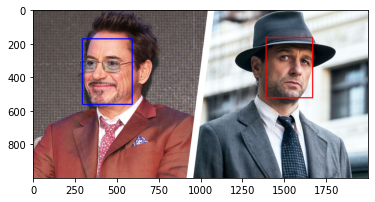

In [91]:
robert_true = get_face_from_path('Faces/robert_1.jpg')
image = read_image('Faces/robert_3.jpg')
res_face, res_box = get_most_similar_face(image, robert_true)
_, boxes = get_all_faces(image)
plt.imshow(draw_box(image, res_box, all_boxes=boxes, color=(0,0,255)))

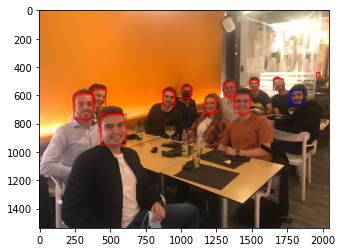

In [98]:
robert_true = get_face_from_path('prueb/yo.jpg')
image = read_image('prueb/todos.jpeg')
res_face, res_box = get_most_similar_face(image, robert_true)
_, boxes = get_all_faces(image)
plt.imshow(draw_box(image, res_box, all_boxes=boxes, color=(0,0,255)))
plt.savefig('prueb/todos_detect.jpeg', dpi=300)